In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Stilleri Seaborn olarak ayarlama
sns.set
#KMeans modülünü içe aktarma
from sklearn.cluster import KMeans


In [7]:
#Verinin yüklenmesi
data = pd.read_csv('points.txt', delimiter="\t")

In [8]:
#Verinin incelenmesi
data

,x,y
0,0.12,0.29
1,0.57,0.19
2,0.60,0.57
3,0.06,0.28
4,0.06,0.42
...,...,...
95,0.48,0.22
96,0.11,0.57
97,0.65,0.69
98,0.55,0.42


Text(0, 0.5, 'y')

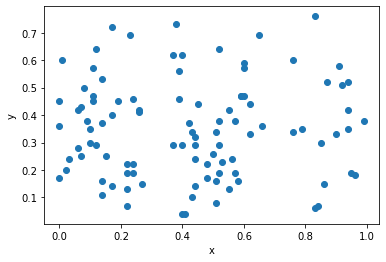

In [9]:
# İki değişkenin açılım grafiğini oluşturma
plt.scatter(data['x'], data['y'])
#Eksenleri isimlendirme
plt.xlabel('x')
plt.ylabel('y')

In [10]:
#Veri değişkeninin bir kopyasını oluşturarak her iki özelliği de seçiyoruz.
x=data.copy()

In [11]:
# Bir nesne oluşturalım buna kmeans diyelim
# Parantez içindeki sayı K, yani hedeflediğimiz küme sayısıdır.
kmeans=KMeans(4)

#datayı fit edelim(uyduralım)
kmeans.fit(x)


KMeans(n_clusters=4)

In [12]:
#input verilerinin bir kopyasını oluşturalım
clusters=x.copy()
#öngörülen kümeleri not edelim
clusters['kume_tahmin']=kmeans.fit_predict(x)

Text(0, 0.5, 'y')

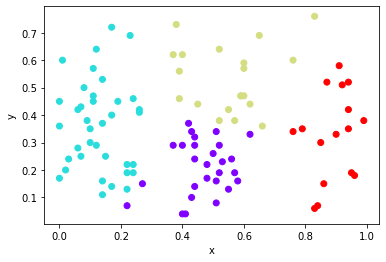

In [13]:
# c (color) bir değişkenle kodlanabilen bir argümandır
# bu durumda değişken, plt.scattera iki renk olduğunu 
# gösteren 0,1 değerlerine sahiptir. (0,1) Küme 0'daki tüm noktalar aynı renk
#Küme 1'deki noktalar başka renk oluyor.
# cmap renk haritasıdır
plt.scatter(clusters['x'], clusters['y'], c=clusters['kume_tahmin'], cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')

In [14]:
# K'yı seçmek
#boş liste oluşturmak (küme içi kareler toplaması)
kikt=[]

#olası tüm küme çözümlerini bir döngü ile oluşturma
# 1 ile 9 kümeden çözüm elde etmeyi seçtik; 
for i in range (1,10):
    kmeans=KMeans(i)
    #standartlaştırılış veriyi fit etme
    kmeans.fit(x)
    # yineleme değerini kikt'ye ekleme
    kikt.append(kmeans.inertia_)
    
#sonucu kontrol
kikt

[10.940703999999997,
 5.451443232323232,
 3.6983516895249444,
 2.6599037689393934,
 1.9097807306255832,
 1.5546754047619054,
 1.3060811223571753,
 1.1042199335459864,
 0.9668918857303688]

Text(0, 0.5, 'Küme-içi Kareler Toplamı')

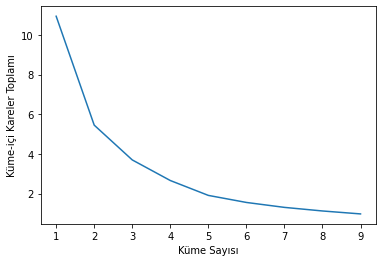

In [11]:
# küme sayısı ve kikt grafiğini çizdirme
plt.plot(range(1,10), kikt)
#eksenleri isimlendirme
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-içi Kareler Toplamı')

#Elbow Yöntemi
# küme sayısına göre baktığımızda aslında 4 ten sonra bükülme oluyor gibi

In [15]:
kmeans_new=KMeans(5)

#datayı fit edelim(uyduralım)
kmeans_new.fit(x)
cluster_new= x.copy()
cluster_new['kume_tahmin']=kmeans_new.fit_predict(x)

In [13]:
cluster_new

,x,y,kume_tahmin
0,0.12,0.29,0
1,0.57,0.19,3
2,0.60,0.57,2
3,0.06,0.28,0
4,0.06,0.42,4
...,...,...,...
95,0.48,0.22,3
96,0.11,0.57,4
97,0.65,0.69,2
98,0.55,0.42,2


Text(0, 0.5, 'y')

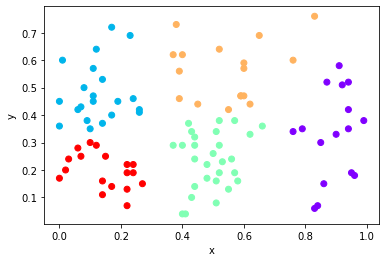

In [22]:
plt.scatter(cluster_new['x'], cluster_new['y'], c=cluster_new['kume_tahmin'], cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
